In [1]:
import scvelo as scv
import numpy as np  
import matplotlib.pyplot as plt

import anndata

import sys
sys.path.append("..")


import cellpath as cp
import cellpath.visual as visual
import cellpath.benchmark as bmk 
import cellpath.de_analy as de


from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
from sklearn.kernel_ridge import KernelRidge

# CellPath core

In [2]:
# pre-clustered dataseet
adata = anndata.read_h5ad("../example_data/real/forebrain/fb_clust.h5ad")

In [22]:
cellpath_obj = cp.CellPath(adata = adata)
# self, n_clusters = None, include_unspliced = True, standardize = True, **kwarg
cellpath_obj.meta_cell_construction(n_clusters = 100, include_unspliced = True, standardize = True)
cellpath_obj.meta_cell_graph(k_neighs = 10, pruning = True)
cellpath_obj.meta_paths_finding(threshold = 0.5, cutoff_length = None, length_bias = 0.5, max_trajs = 30)
cellpath_obj.first_order_pt(num_trajs = None)

Already conducted clustering
Meta-cell constructed
Meta-cell level neighborhood graph constructed
conduct quality control
selected path (starting_ending):
start_end:  14_93 , len:  15 newly covered: 15
start_end:  25_29 , len:  10 newly covered: 9
start_end:  98_2 , len:  15 newly covered: 6
start_end:  27_0 , len:  9 newly covered: 7
start_end:  42_51 , len:  9 newly covered: 6
start_end:  50_69 , len:  7 newly covered: 6
start_end:  14_35 , len:  13 newly covered: 2
start_end:  14_39 , len:  11 newly covered: 2
start_end:  14_23 , len:  13 newly covered: 1
Finished
Cell-level pseudo-time inferred


# Visualization

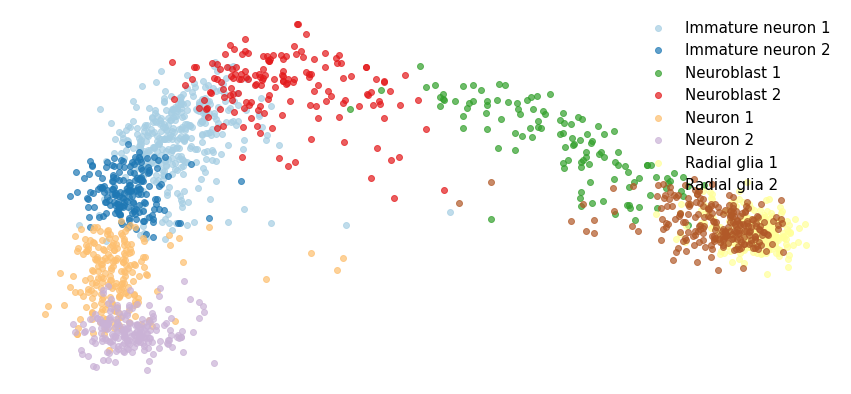

In [24]:
visual.plot_data(cellpath_obj, basis = "pca", figsize = (15,7), save_as = None, axis = False, colormap = "Paired", legend_pos = "upper right")

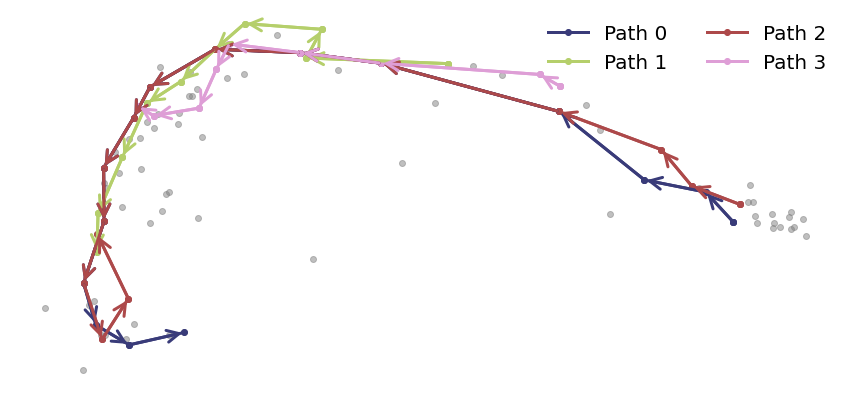

In [25]:
visual.meta_traj_visual(cellpath_obj, basis = "pca", trajs = 4, figsize = (15,7), save_as = None, colormap = "tab20b", axis = False, legend_pos = "upper right")

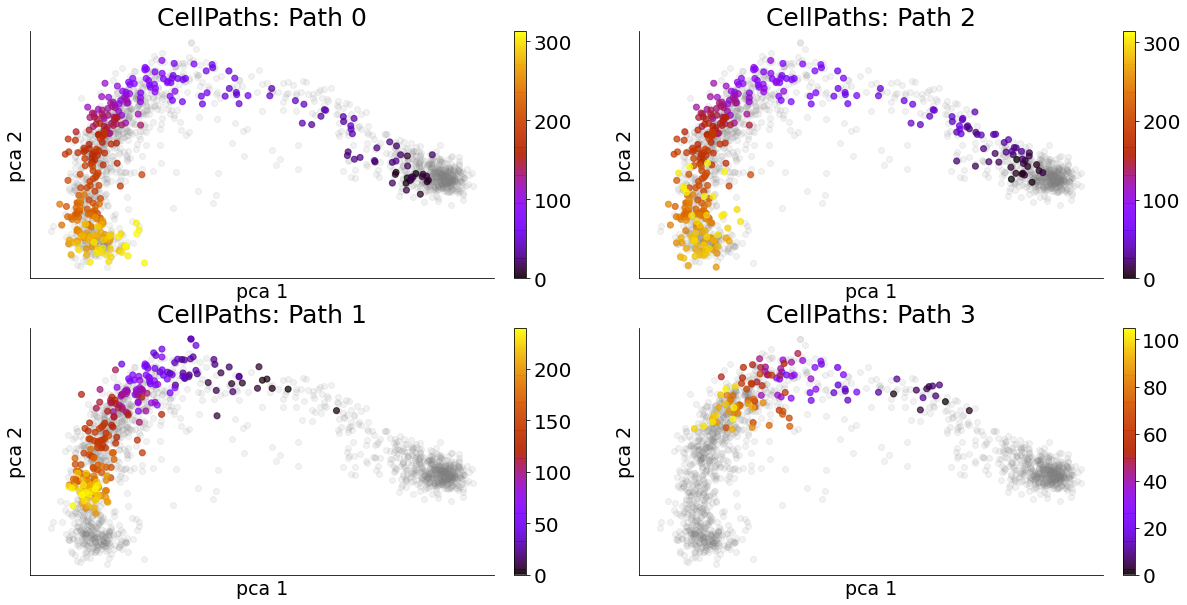

In [26]:
visual.first_order_approx_pt(cellpath_obj, basis="pca", trajs = 4, figsize = (20,10), save_as = None)